# [PUBG Finish Placement Prediction (Kernels Only)](https://www.kaggle.com/competitions/pubg-finish-placement-prediction)


* Id - 플레이어의 Id
* groupId - 경기 내의 그룹을 식별하는 ID. 현재 그룹의 선수들이 서로 다른 경기에서 경기한다면, 그들은 매번 다른 groupId를 갖게 될 것이다.
* matchId - 경기를 식별하기 위한 ID. train set과 test set에 모두 있는 시합은 없다.
* matchDuration - 경기 시간.
* matchType - 솔로, 듀오와 같은 게임 종류 그 외에는 이벤트게임 -컬럼확인 필요
* assists - 어시스트
* boosts - 부스트 아이템 사용한 수.
 * damageDealt - 가한 데미지 총량. Note: 자신에게 가한 데미지는 제외.
* DBNOs - 빈사상태로 만든 적의 수.
* headshotKills - 헤드샷 으로 처리한 적의 수.
* heals - 치료 아이템 사용 수.
* killPlace - 경기에서 처치한 적의 수 랭킹.
* killPoints - 플레이어의 처치 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, killPoints에서 0은 "없음"으로 처리되어야 한다.
* kills - 처치한 적의 수.
* killStreaks - 단기간에 가장 많이 처치한 적의 최대치.
* longestKill - 플레이어가 적을 죽인 가장 긴 거리. 상대를 죽이고 멀리 운전하는 것이 가장 긴 처치로 이어질 수 있기 때문에 오해의 소지가 있을 수 있다.
* maxPlace - 경기에서 가장 순위가 낮은 것에 대한 데이터. 이것은 순위를 건너뛸 수도 있기 때문에 numGroups와 일치하지 않을 수 있다.
* numGroups - 경기에 있는 팀의 수.
* rankPoints - Elo 방식의 플레이어 랭킹. 다음 버전의 API에서는 삭제될 예정이기 때문에 사용에 주의. '-1' 값은 순위가 "None" 이다.
* revives - 플레이어가 팀원 회복 시킨 수.
* rideDistance - 차량으로 이동한 거리(단위 : 미터).
* roadKills - 차량으로 죽인 플레이어 수.
*  swimDistance - 수영한 거리(단위 : 미터).
* teamKills - 팀킬한 횟수.
* vehicleDestroys - 차량을 폭파시킨 횟수.
* walkDistance - 걸은 총 거리(단위 : 미터).
* weaponsAcquired - 무기 얻은 갯수.
* winPoints - 플레이어의 승리 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, winPoints에서 0은 "없음"으로 처리되어야 한다.
* **winPlacePerc** - 예측 목표. 순위의 퍼센트로 표시되며, 1이면 경기에서 1등이고 0이면 경기에서 꼴지 했다는 것이다. 이것은 numGroups로 계산되는게 아니라, maxPlace로 계산되기 때문에 누락되는 것이 있을수도다.


## Reference
https://www.kaggle.com/code/yihg312/final/notebook

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.float_format = '{:.4f}'.format
data_path = "../input/pubg-finish-placement-prediction"
train_file = f"{data_path}train_V2.csv"
test_file = f"{data_path}test_V2.csv"
sample_submit_file = f"{data_path}sample_submission_V2.csv"

# Load Data

In [2]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

print(train.shape, test.shape)

(4446966, 29) (1934174, 28)


In [3]:
set(train.columns) - set(test.columns)

{'winPlacePerc'}

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
train = train.dropna()
train.shape

(4446965, 29)

In [7]:
test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

## 데이터 타입 지정해서 메모리 줄이기

In [8]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [9]:
train = reduce_mem_usage(train)
print(train.info())

print("\n", " ---- "*10, "\n")

test = reduce_mem_usage(test)
print(test.info())

Mem. usage decreased to 322.31 Mb (68.3% reduction)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float16
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float16
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float16
 21  roadKills        int8   
 22  swimDistance     float16
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     flo

# Data Preprocessing

## Derived Variable
- 아래의 파생변수는 만들면서 인코딩도 같이 진행
    - boosts + heals -> boosts_heals
    - matchType -> matchType_game, matchType_team, matchType_fpp
        - matchType_game = {0: "rank", 1: "nomal", 2: "event"}
        - matchType_team = {0: "solo", 1: "duo", 2: "squad", 3: "event"}
        - matchType_fpp = {0: "tpp", 1: "fpp"}
    - swimDistance + walkDistance -> nonrideDistance
[['solo', 'duo', 'squad'], ['solo-fpp', 'duo-fpp', 'squad-fpp'],['normal-solo', 'normal-duo', 'normal-squad'],
['normal-solo-fpp', 'normal-duo-fpp', 'normal-squad-fpp'],['crashtpp', 'crashfpp', 'flaretpp''flarefpp']]

### matchType

파생변수 만들면서, ode, lbe 진행

In [10]:
train["matchType"].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [11]:
train["matchType"].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [12]:
train["matchType"].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [13]:
# matchType_game = {0: "rank", 1: "nomal", 2: "event"}

def temp(x):
    rank = ['solo', 'duo', 'squad', 'solo-fpp', 'duo-fpp', 'squad-fpp']
    nomal = ['normal-solo', 'normal-duo', 'normal-squad', 'normal-solo-fpp', 'normal-duo-fpp', 'normal-squad-fpp']
    event = ['crashtpp', 'crashfpp', 'flaretpp''flarefpp']
    if x in rank:
        return 0
    elif x in nomal:
        return 1
    elif x in event:
        return 2
    else:
        return 2 
    
train["matchType_game"] = train["matchType"].map(temp).astype(np.uint8)
train["matchType_game"]

0          0
1          0
2          0
3          0
4          0
          ..
4446961    0
4446962    0
4446963    0
4446964    0
4446965    0
Name: matchType_game, Length: 4446965, dtype: uint8

In [14]:
test["matchType_game"] = test["matchType"].map(temp).astype(np.uint8)
test["matchType_game"]

0          0
1          0
2          0
3          0
4          0
          ..
1934169    0
1934170    0
1934171    0
1934172    0
1934173    0
Name: matchType_game, Length: 1934174, dtype: uint8

In [15]:
# matchType_team = {0: "solo", 1: "duo", 2: "squad", 3: "event"}

def temp(x):
    if "solo" in x:
        return 0
    elif 'duo' in x:
        return 1
    elif 'squad' in x:
        return 2
    else:
        return 3

train["matchType_team"] = train["matchType"].map(temp).astype(np.uint8)
train["matchType_team"]

0          2
1          2
2          1
3          2
4          0
          ..
4446961    2
4446962    0
4446963    2
4446964    2
4446965    0
Name: matchType_team, Length: 4446965, dtype: uint8

In [16]:
test["matchType_team"] = test["matchType"].map(temp).astype(np.uint8)
test["matchType_team"]

0          2
1          1
2          2
3          1
4          2
          ..
1934169    2
1934170    2
1934171    2
1934172    1
1934173    2
Name: matchType_team, Length: 1934174, dtype: uint8

In [17]:
# matchType_fpp = {0: "tpp", 1: "fpp"}

def temp(x):
    if "fpp" in x:
        return 1
    else:
        return 0

train["matchType_fpp"] = train["matchType"].map(temp).astype("uint8")
train["matchType_fpp"].value_counts()

1    3320988
0    1125977
Name: matchType_fpp, dtype: int64

In [18]:
test["matchType_fpp"] = test["matchType"].map(temp).astype("uint8")
test["matchType_fpp"].value_counts()

1    1438356
0     495818
Name: matchType_fpp, dtype: int64

### boosts_heals = boosts + heals

In [19]:
train["boosts_heals"] = train["boosts"] + train["heals"]
train["boosts_heals"]

0          0
1          0
2          0
3          0
4          0
          ..
4446961    0
4446962    1
4446963    0
4446964    6
4446965    3
Name: boosts_heals, Length: 4446965, dtype: int8

In [20]:
test["boosts_heals"] = test["boosts"] + test["heals"]
test["boosts_heals"]

0           0
1           6
2           4
3           0
4           5
           ..
1934169     9
1934170     0
1934171     3
1934172    14
1934173     0
Name: boosts_heals, Length: 1934174, dtype: int8

### nonrideDistance = swimDistance + walkDistance

In [21]:
train["nonrideDistance"] = train["swimDistance"] + train["walkDistance"]
train["nonrideDistance"].describe()

count   4446965.0000
mean             NaN
std              NaN
min           0.0000
25%         155.3750
50%         687.0000
75%        1985.0000
max       26160.0000
Name: nonrideDistance, dtype: float64

In [22]:
test["nonrideDistance"] = test["swimDistance"] + test["walkDistance"]
test["nonrideDistance"].describe()

count   1934174.0000
mean             NaN
std              NaN
min           0.0000
25%         154.3750
50%         681.0000
75%        1978.0000
max       14912.0000
Name: nonrideDistance, dtype: float64

### totalDistance

In [23]:
train["totalDistance"] = train["swimDistance"] + train["walkDistance"] + train["rideDistance"]
train["totalDistance"].describe()

count   4446965.0000
mean             NaN
std              NaN
min           0.0000
25%         158.1250
50%         788.0000
75%        2728.0000
max       41280.0000
Name: totalDistance, dtype: float64

In [24]:
test["totalDistance"] = test["swimDistance"] + test["walkDistance"] + test["rideDistance"]
test["totalDistance"].describe()

count   1934174.0000
mean             NaN
std              NaN
min           0.0000
25%         157.1250
50%         777.5000
75%        2702.0000
max       40800.0000
Name: totalDistance, dtype: float64

# EDA

## 기술통계

In [25]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446965.0000,0.2338,0.5886,0.0000,0.0000,0.0000,0.0000,22.0000
boosts,4446965.0000,1.1069,1.7158,0.0000,0.0000,0.0000,2.0000,33.0000
damageDealt,4446965.0000,NaN,NaN,0.0000,0.0000,84.2500,186.0000,6616.0000
DBNOs,4446965.0000,0.6579,1.1457,0.0000,0.0000,0.0000,1.0000,53.0000
headshotKills,4446965.0000,0.2268,0.6022,0.0000,0.0000,0.0000,0.0000,64.0000
heals,4446965.0000,1.3701,2.6800,0.0000,0.0000,0.0000,2.0000,80.0000
killPlace,4446965.0000,47.5994,27.4629,1.0000,24.0000,47.0000,71.0000,101.0000
killPoints,4446965.0000,505.0062,627.5049,0.0000,0.0000,0.0000,1172.0000,2170.0000
kills,4446965.0000,0.9248,1.5584,0.0000,0.0000,0.0000,1.0000,72.0000
killStreaks,4446965.0000,0.5440,0.7110,0.0000,0.0000,0.0000,1.0000,20.0000


In [26]:
train.describe(include="O")

,Id,groupId,matchId,matchType
count,4446965,4446965,4446965,4446965
unique,4446965,2026744,47964,16
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,squad-fpp
freq,1,74,100,1756186


## hist

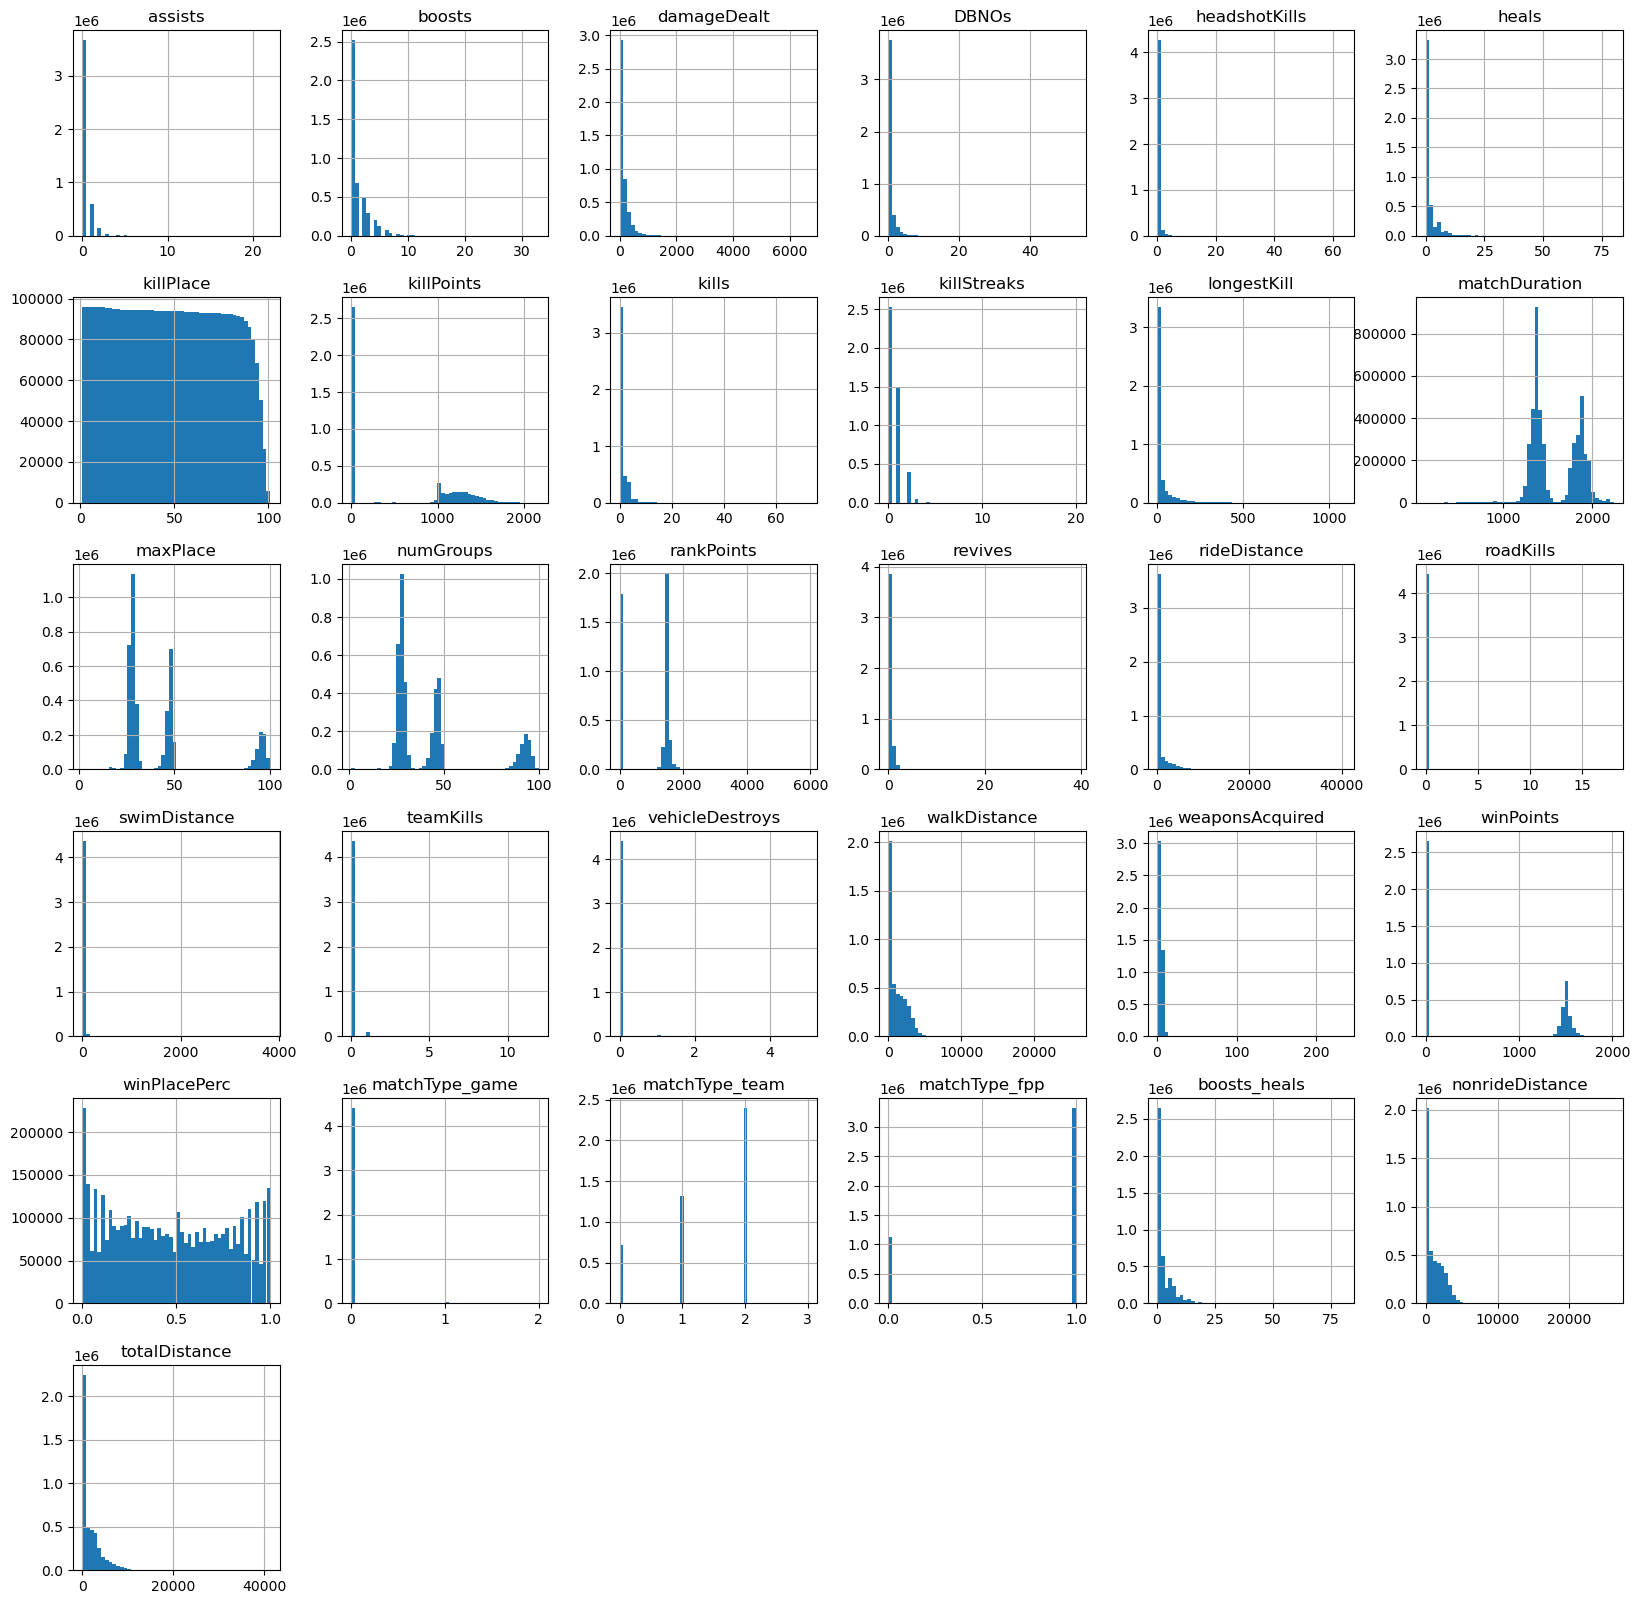

In [27]:
train.hist(figsize=(20, 20), bins=50);

## corr

In [28]:
corr = pd.DataFrame(train.drop(columns = "winPlacePerc").corrwith(train["winPlacePerc"]))
corr_sort_abs = corr.sort_values(by=0, ascending=0, key=abs)
corr_sort_abs

,0
nonrideDistance,0.8110
walkDistance,0.8109
killPlace,-0.7191
totalDistance,0.6770
boosts,0.6342
weaponsAcquired,0.5838
boosts_heals,0.5760
damageDealt,0.4405
heals,0.4279
kills,0.4199


In [29]:
corr_high = corr.loc[np.abs(corr_sort_abs[0]) > 0.3]
corr_high

,0
boosts,0.6342
damageDealt,0.4405
heals,0.4279
killPlace,-0.7191
kills,0.4199
killStreaks,0.3776
longestKill,0.4102
rideDistance,0.3429
walkDistance,0.8109
weaponsAcquired,0.5838


<AxesSubplot:>

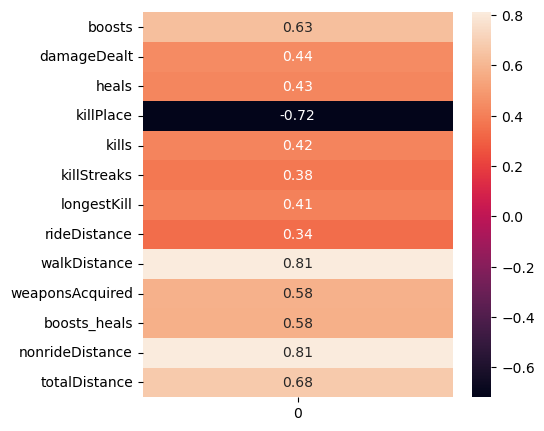

In [30]:
plt.figure(figsize = (5, 5))
sns.heatmap(data = corr_high, annot = True, fmt = '.2f')

# ML

## train, test

In [31]:
# raw 데이터가 너무 커서 샘플링, 모델링할 때 활용
# _rs : random sample 데이터

train = train.sample(n=10000)
display(train.head())
print(train.shape)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_game,matchType_team,matchType_fpp,boosts_heals,nonrideDistance,totalDistance
650689,9180c99b06d3e3,c4c1c6e6c3d149,d7927e557fca89,0,1,190.6250,0,0,1,28,...,1710.0000,3,1508,0.8174,0,0,1,2,1710.0000,1710.0000
4210626,8d74e626d01f66,6c725e08d61019,2f1a00a520be4a,0,0,111.5000,1,1,0,33,...,2660.0000,7,0,0.6538,0,2,1,0,2660.0000,2660.0000
2040864,6e6d2ed6226041,9f4bffddcd2890,7a57cb64486671,0,0,0.0000,0,0,0,50,...,1515.0000,5,0,0.7002,0,2,1,0,1515.0000,1515.0000
542225,5fcf05b463a329,ca7fc3a4757fd0,ca58df0afd045c,0,0,0.0000,0,0,0,94,...,16.4688,1,1503,0.0106,0,0,1,0,16.4688,16.4688
3839401,a3ba65cd499585,dcf0975e6d389f,408ba768959eae,0,0,57.0000,1,0,0,87,...,146.7500,2,0,0.1042,0,1,1,0,146.7500,146.7500


(10000, 35)


In [32]:
train = train.set_index(["Id", "groupId", "matchId"])
train

,,,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_game,matchType_team,matchType_fpp,boosts_heals,nonrideDistance,totalDistance
Id,groupId,matchId,,,,,,,,,,,,,,,,,,,,,
9180c99b06d3e3,c4c1c6e6c3d149,d7927e557fca89,0,1,190.6250,0,0,1,28,1318,1,1,...,1710.0000,3,1508,0.8174,0,0,1,2,1710.0000,1710.0000
8d74e626d01f66,6c725e08d61019,2f1a00a520be4a,0,0,111.5000,1,1,0,33,0,1,1,...,2660.0000,7,0,0.6538,0,2,1,0,2660.0000,2660.0000
6e6d2ed6226041,9f4bffddcd2890,7a57cb64486671,0,0,0.0000,0,0,0,50,0,0,0,...,1515.0000,5,0,0.7002,0,2,1,0,1515.0000,1515.0000
5fcf05b463a329,ca7fc3a4757fd0,ca58df0afd045c,0,0,0.0000,0,0,0,94,1007,0,0,...,16.4688,1,1503,0.0106,0,0,1,0,16.4688,16.4688
a3ba65cd499585,dcf0975e6d389f,408ba768959eae,0,0,57.0000,1,0,0,87,0,0,0,...,146.7500,2,0,0.1042,0,1,1,0,146.7500,146.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cf48eb10f373ce,bc2b7c2551eaaf,cf2b3f3ed72a6c,0,3,435.5000,2,0,2,6,1279,4,2,...,2168.0000,8,1517,0.8164,0,1,1,5,2168.0000,2168.0000
c709e33add8af9,bfab392856024c,6f7898ac1e54c7,0,0,0.0000,0,0,0,69,1059,0,0,...,186.2500,1,1496,0.3230,0,0,1,0,186.2500,186.2500
6d755a24951720,c263095fbfd05f,589ac7f6a9b701,1,6,86.3125,1,0,2,25,1552,1,1,...,4420.0000,10,1499,0.7036,0,2,1,8,4420.0000,6696.0000


In [33]:
test = test.set_index(["Id", "groupId", "matchId"])
test

,,,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_game,matchType_team,matchType_fpp,boosts_heals,nonrideDistance,totalDistance
Id,groupId,matchId,,,,,,,,,,,,,,,,,,,,,
9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.4688,0,0,0,73,0,0,0,...,0,588.0000,1,0,0,2,1,0,588.0000,588.0000
639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.1250,0,0,2,11,0,2,1,...,0,2017.0000,6,0,0,1,1,6,2017.0000,6684.0000
63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.4062,0,0,4,49,0,0,0,...,0,788.0000,4,0,0,2,1,4,788.0000,788.0000
cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.5000,0,0,0,54,0,0,0,...,0,1812.0000,3,0,0,1,1,0,1812.0000,1812.0000
ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.2500,1,2,1,7,0,3,1,...,0,2964.0000,4,0,0,2,1,5,2964.0000,2964.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.0000,3,0,7,4,1294,4,2,...,0,1799.0000,5,1526,0,2,1,9,1799.0000,1799.0000
5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.0000,0,0,0,64,1449,0,0,...,0,1195.0000,3,1496,0,2,1,0,1195.0000,1195.0000
fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.9375,0,0,3,24,0,1,1,...,0,3328.0000,3,0,0,2,1,3,3336.0000,3336.0000


In [34]:
label = 'winPlacePerc'
# features = train_rs.columns.tolist()
# features.remove(label)
features = corr_high.index.to_list()

print(label)
print(features)

winPlacePerc
['boosts', 'damageDealt', 'heals', 'killPlace', 'kills', 'killStreaks', 'longestKill', 'rideDistance', 'walkDistance', 'weaponsAcquired', 'boosts_heals', 'nonrideDistance', 'totalDistance']


In [35]:
X_train = train[features]
y_train = train[label]

X_train.shape, y_train.shape

((10000, 13), (10000,))

In [36]:
X_test = test[features]

X_test.shape

(1934174, 13)

## Train

### Model

In [37]:
# Model 선언
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

### Val

In [38]:
from sklearn.model_selection import cross_val_predict

y_valid_pred = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


array([0.7101709 , 0.74781006, 0.66610352, ..., 0.85875732, 0.6901416 ,
       0.81507812])

In [39]:
mse = np.square(y_train - y_valid_pred).mean()
rmse = np.sqrt(mse)
rmse

0.1112555036522647

<AxesSubplot:xlabel='winPlacePerc'>

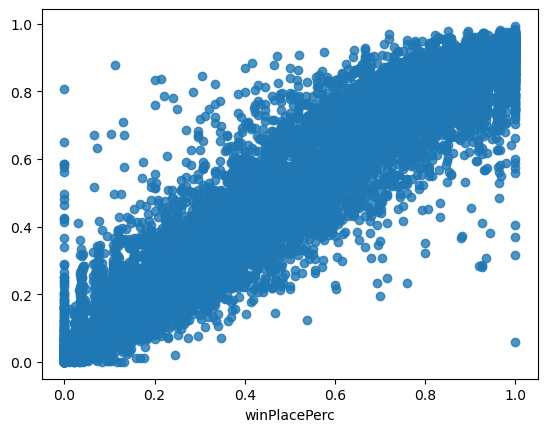

In [40]:
sns.regplot(x=y_train, y=y_valid_pred)

In [41]:
from sklearn.metrics import r2_score

r2_score(y_train, y_valid_pred)

0.8690764816610544

<AxesSubplot:xlabel='winPlacePerc', ylabel='Density'>

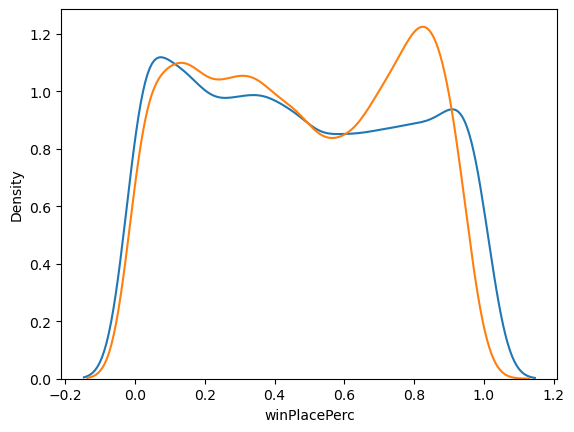

In [42]:
sns.kdeplot(y_train)
sns.kdeplot(y_valid_pred)

# Test

## 예측

In [43]:
y_predict = model.fit(X_train, y_train).predict(X_test)
y_predict

array([0.25450195, 0.83606201, 0.6275354 , ..., 0.88738281, 0.73916504,
       0.08908463])

In [44]:
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_in_
fi.nlargest(20)

nonrideDistance   0.4026
walkDistance      0.2888
killPlace         0.1976
totalDistance     0.0260
longestKill       0.0194
damageDealt       0.0185
weaponsAcquired   0.0126
boosts            0.0082
kills             0.0068
boosts_heals      0.0062
killStreaks       0.0045
rideDistance      0.0044
heals             0.0044
dtype: float64

<AxesSubplot:>

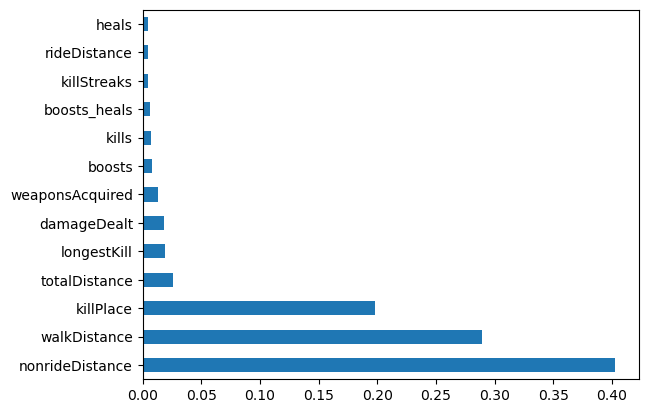

In [45]:
fi.nlargest(20).plot.barh()

# submit

In [46]:
submit = pd.read_csv(sample_submit_file)
submit.head(2)

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1


In [47]:
submit["winPlacePerc"] = y_predict

In [48]:
file_name = f"{data_path}submission_{rmse:.5f}.csv"
file_name

'./data/submission_0.11126.csv'

In [49]:
submit.to_csv(file_name, index=False)

In [50]:
pd.read_csv(file_name)

,Id,winPlacePerc
0,9329eb41e215eb,0.2545
1,639bd0dcd7bda8,0.8361
2,63d5c8ef8dfe91,0.6275
3,cf5b81422591d1,0.5755
4,ee6a295187ba21,0.9471
...,...,...
1934169,a316c3a13887d5,0.7612
1934170,5312146b27d875,0.4211
1934171,fc8818b5b32ad3,0.8874
1934172,a0f91e35f8458f,0.7392
